In [112]:
import os

In [113]:
os.getcwd()

'P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Scripts'

In [114]:
os.chdir('P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Scripts')

In [115]:
os.getcwd()

'P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Scripts'

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

In [117]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Data\stats.csv')
magic.head()

,FirstName,LastName,PlayerID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,vucevni01,30-111,C,2/12/2021,ORL,@,SAC,W,...,1,8,9,4,2,0,1,1,42,24.7
1,Nikola,Vucevic,vucevni01,30-104,C,2/5/2021,ORL,NaN,CHI,W,...,3,16,19,4,0,1,1,2,43,14.2
2,Nikola,Vucevic,vucevni01,30-084,C,1/16/2021,ORL,@,BRK,L,...,4,6,10,7,5,0,4,4,34,18.5
3,Nikola,Vucevic,vucevni01,30-118,C,2/19/2021,ORL,NaN,GSW,W,...,0,16,16,10,1,1,0,1,30,12.5
4,Nikola,Vucevic,vucevni01,30-120,C,2/21/2021,ORL,NaN,DET,W,...,0,12,12,3,1,2,1,2,37,11.7


In [118]:
magic.tail()

,FirstName,LastName,PlayerID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
339,Gary,Clark,clarkga01,26-063,F,1/18/2021,ORL,@,NYK,L,...,0,2,2,0,0,1,0,1,0,-15.3
340,Gary,Clark,clarkga01,26-053,F,1/8/2021,ORL,@,HOU,L,...,0,4,4,0,0,1,2,1,0,-15.8
341,Aaron,Gordon,gordoaa01,25-133,F,1/27/2021,ORL,NaN,SAC,L,...,1,4,5,5,0,0,4,4,3,-19.5
342,Dwayne,Bacon,bacondw01,25-141,G,1/18/2021,ORL,@,NYK,L,...,0,1,1,1,0,0,1,5,2,-18.3
343,Dwayne,Bacon,bacondw01,25-147,G,1/24/2021,ORL,NaN,CHO,L,...,0,3,3,2,0,0,3,4,2,-26.7


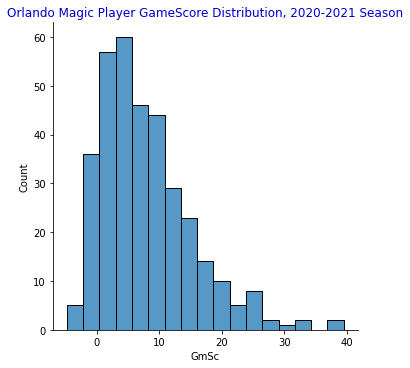

In [119]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

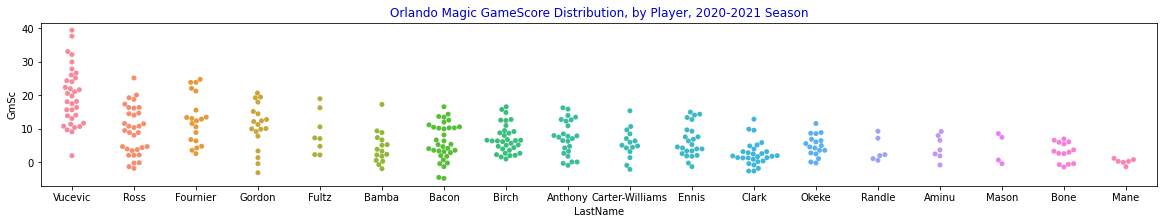

In [120]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

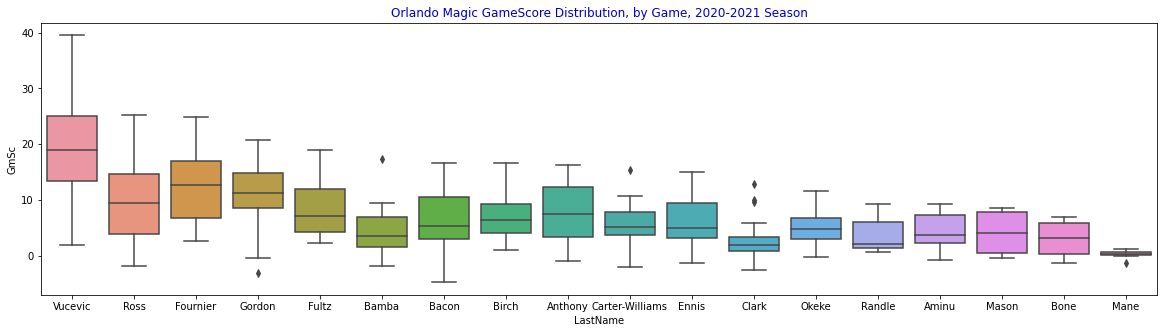

In [121]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


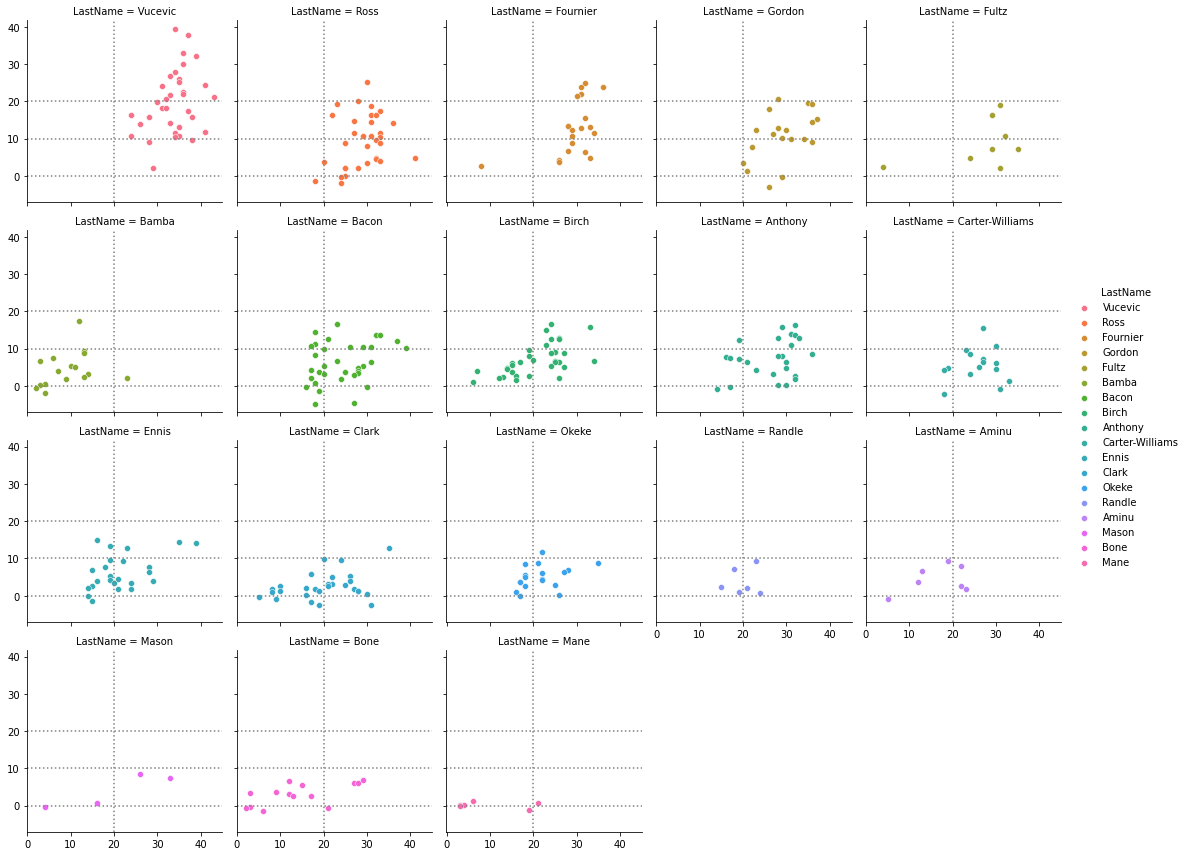

In [122]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


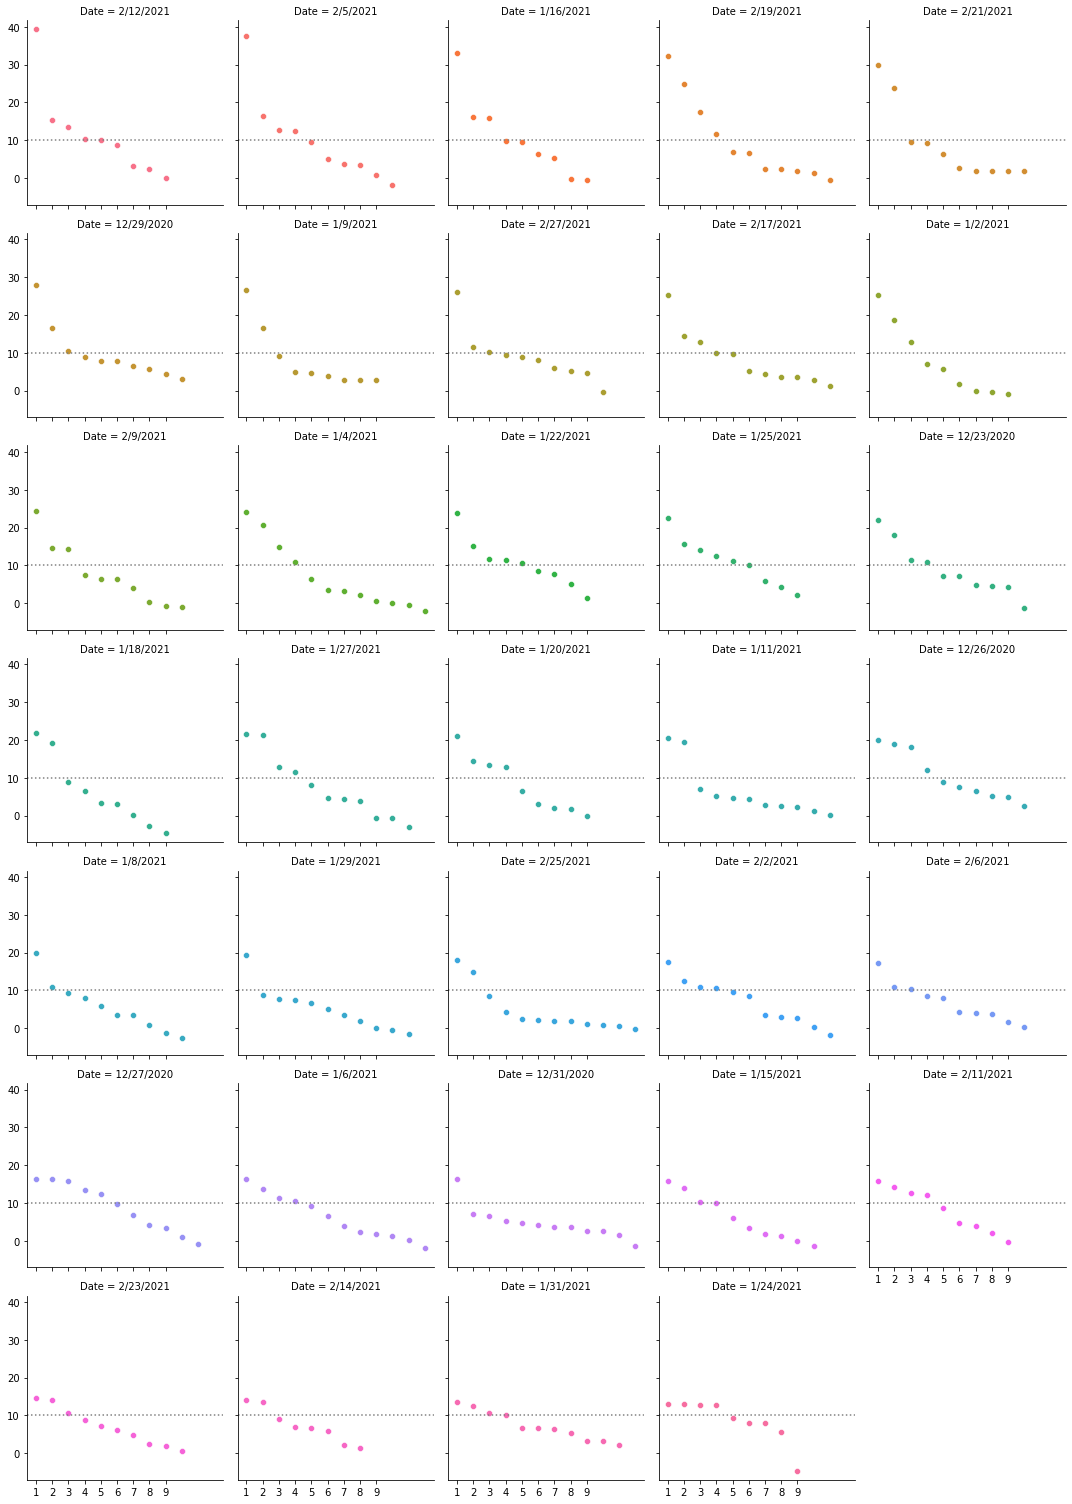

In [123]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

In [124]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu             7.0   4.442857  3.610567 -0.8   2.200   3.70   7.300   9.2
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            34.0   6.202941  5.470609 -4.8   2.975   5.35  10.450  16.6
Bamba            16.0   4.500000  4.768648 -1.9   1.500   3.60   6.875  17.3
Birch            33.0   7.063636  4.247265  1.0   4.000   6.40   9.200  16.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter-Williams  15.0   5.613333  4.463321 -2.1   3.750   5.10   7.800  15.4
Clark            28.0   2.603571  3.601181 -2.6   0.775   1.85   3.400  12.9
Ennis            24.0   6.379167  4.778573 -1.3   3.200   4.95   9.400  15.0
Fournier         20.0  12.825000  7.187260  2.6   6.700  12.65  17.025  24.8
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           19.0  10.747368  6.728164 -3.1   8.500  11.30  14.850  20.7
Mane              6.0   0.216667  0.856543 -1.3   0.075   0.30   0.675   1.2
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            18.0   5.016667  3.206290 -0.2   3.000   4.80   6.800  11.6
Randle            6.0   3.750000  3.600417  0.6   1.325   2.15   5.975   9.3
Ross             33.0   9.445455  7.063334 -1.8   3.800   9.50  14.700  25.2
Vucevic          34.0  19.794118  8.655422  2.0  13.300  19.00  25.000  39.5

In [125]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vucevic          673.0  1148
Ross             311.7   954
Fournier         256.5   586
Birch            233.1   679
Bacon            210.9   826
Gordon           204.2   554
Anthony          183.9   664
Ennis            153.1   513
Okeke             90.3   389
Carter-Williams   84.2   387
Clark             72.9   558
Bamba             72.0   147
Fultz             69.6   215
Bone              43.4   197
Aminu             31.1   116
Randle            22.5   120
Mason             16.4    79
Mane               1.3    56


In [126]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vucevic          1148  673.0
Ross              954  311.7
Bacon             826  210.9
Birch             679  233.1
Anthony           664  183.9
Fournier          586  256.5
Clark             558   72.9
Gordon            554  204.2
Ennis             513  153.1
Okeke             389   90.3
Carter-Williams   387   84.2
Fultz             215   69.6
Bone              197   43.4
Bamba             147   72.0
Randle            120   22.5
Aminu             116   31.1
Mason              79   16.4
Mane               56    1.3


In [127]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2/19/2021   106.9
12/26/2020  105.0
2/12/2021   103.6
2/5/2021     99.7
12/29/2020   99.2
12/27/2020   98.6
1/25/2021    98.1
1/16/2021    95.7
1/22/2021    95.5
2/17/2021    93.0
2/27/2021    89.7
2/21/2021    89.6
12/23/2020   89.1
1/27/2021    84.2
1/4/2021     83.9
1/31/2021    80.5
1/24/2021    77.9
2/2/2021     77.5
2/9/2021     76.2
1/6/2021     75.4
1/20/2021    75.2
1/9/2021     74.3
2/11/2021    73.3
2/23/2021    71.7
1/11/2021    70.3
1/2/2021     69.9
2/6/2021     69.3
1/15/2021    61.1
2/14/2021    59.8
1/29/2021    58.8
1/8/2021     57.8
12/31/2020   56.7
2/25/2021    56.4
1/18/2021    56.2


In [128]:
magic.describe()

,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,344.000000,344.000000,344.000000,344.000000,344.000000,331.000000,344.000000,344.000000,313.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,334.000000
mean,7.936337,0.494186,23.802326,3.845930,8.941860,0.416574,2.703488,5.686047,0.474412,1.142442,...,1.063953,3.537791,4.601744,2.238372,0.700581,0.424419,1.241279,1.674419,10.366279,-2.242515
std,7.280421,0.500694,8.745604,3.272304,6.289618,0.213945,2.528990,4.570820,0.276181,1.346652,...,1.375115,2.921474,3.516077,2.168186,0.922918,0.732492,1.325874,1.337435,8.345291,9.931809
min,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,2.575000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.300000,0.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.700000
50%,6.450000,0.000000,25.000000,3.000000,7.000000,0.409000,2.000000,4.000000,0.500000,1.000000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,8.000000,-2.800000
75%,11.775000,1.000000,31.000000,5.250000,13.000000,0.531000,4.000000,8.000000,0.667000,2.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.800000
max,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,6.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,6.000000,6.000000,43.000000,60.300000


In [131]:
import sweetviz as sv

my_report = sv.analyze(magic)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
